In [1]:
# Parameters
scenario_name = ""
PV_scenario = ""
Onshore_scenario = ""
Offshore_scenario = ""
onshore_development_rate = 0
offshore_development_rate = 0
pv_development_rate =0
CO2_factor_Kohle = 0
CO2_factor_Gas = 0
share_coal = 0
share_gas = 0
IST_installierte_waermepumpen = 0
SOLL_installierte_waermepumpen = 0
eAutoskWh = 0
eAutosNow = 0
eAutosIncrease = 0
chargin_distribution_public = 0
chargin_distribution_office = 0
chargin_distribution_home = 0
gridlost = 0
consumption_year = 0
start_year_ee = 0
end_year_ee = 0
end_year_extrapolation_installed_power = 0
growth_rate_PV = 0
growth_rate_Onshore = 0
growth_rate_Offshore = 0
case_performance_factor = ""
start_year_simulation = 0
end_year_simulation = 0
base_year_generation = 0
case_Temperature = ""
selected_week_plot = 0
selected_year_plot = 0
max_power_storage = 0
max_storage_capacity = 0
max_power_flexipowerplant = 0
consumption_development_per_year = {}
max_power_storage_start_year = 0
max_power_flexipowerplant_start_year = 0
capex_Onshore = 0
capex_Offshore = 0
capex_PV_Dach_Kleinanlagen = 0
capex_PV_Dach_Großanlagen = 0
capex_PV_Freifläche = 0
capex_Agri_PV = 0
capex_percentage_Dach_Kleinanlgage = 0
capex_percentage_Dach_Großanlagen = 0
capex_percentage_Freifläche = 0
capex_percentage_Agri_PV = 0
capex_Bat_PV_klein = 0
capex_Bat_PV_groß = 0
capex_Bat_PV_frei = 0
capex_percentage_Bat_PV_klein = 0
capex_percentage_Bat_PV_groß = 0
capex_percentage_Bat_PV_frei = 0
capex_H2_Gasturbine = 0
capex_H2_GuD = 0
capex_percentage_H2_Gasturbine = 0
capex_percentage_H2_GuD = 0

In [2]:
# Parameters
scenario_name = "Best-Case"
PV_scenario = "best"
Onshore_scenario = "best"
Offshore_scenario = "best"
CO2_factor_Kohle = 0.35
CO2_factor_Gas = 0.2
share_coal = 0.58974
share_gas = 0.41026
IST_installierte_waermepumpen = 1400000.0
SOLL_installierte_waermepumpen = 6000000.0
eAutoskWh = 6.4
eAutosNow = 1400000.0
eAutosIncrease = 600000.0
chargin_distribution_public = 0.7
chargin_distribution_office = 0.15
chargin_distribution_home = 0.15
gridlost = 0.95279
consumption_year = 2023
start_year_ee = 2015
end_year_ee = 2023
end_year_extrapolation_installed_power = 2030
growth_rate_PV = 18936.0
growth_rate_Onshore = 1.095
growth_rate_Offshore = 1.198
case_performance_factor = "BestCase"
start_year_simulation = 2024
end_year_simulation = 2030
base_year_generation = 2023
case_Temperature = "BestCase"
selected_week_plot = 22
selected_year_plot = 2030
max_power_storage = 250.0
max_storage_capacity = 500.0
max_power_flexipowerplant = 47.139
max_power_flexipowerplant_start_year = 36.639
max_power_storage_start_year = 7.8
capex_Onshore = 1300.0
capex_Offshore = 2200.0
capex_PV_Dach_Kleinanlagen = 1000.0
capex_PV_Dach_Großanlagen = 900.0
capex_PV_Freifläche = 700.0
capex_Agri_PV = 900.0
capex_percentage_Dach_Kleinanlgage = 0.25
capex_percentage_Dach_Großanlagen = 0.25
capex_percentage_Freifläche = 0.35
capex_percentage_Agri_PV = 0.15
capex_Bat_PV_klein = 500.0
capex_Bat_PV_groß = 450.0
capex_Bat_PV_frei = 400.0
capex_percentage_Bat_PV_klein = 0.15
capex_percentage_Bat_PV_groß = 0.35
capex_percentage_Bat_PV_frei = 0.5
capex_H2_Gasturbine = 550.0
capex_H2_GuD = 1100.0
capex_percentage_H2_Gasturbine = 0.5
capex_percentage_H2_GuD = 0.5
consumption_development_per_year = {
    "2024": 1.080071866,
    "2025": 1.074135684,
    "2026": 1.069018919,
    "2027": 1.06456286,
    "2028": 1.060647297,
    "2029": 1.057179514,
    "2030": 1.054082351,
}


In [3]:
# write all injected parameters to config.py to be able to access them from other modules
from utils import config
from utils.castParmeters import cast_parameters, Params, filter_injected_params

# Filter and cast parameters
params_dict = cast_parameters(filter_injected_params(locals()))


# Convert to a Python object
params = Params(params_dict)

# Update the config with the params object
config.params = params


In [4]:
%load_ext autoreload

%autoreload 2



# V3
## Szenario-basierte Berechnungen für Energieverbrauchs- und Erzeugungsentwicklung bis 2030

In diesem Notebook führen wir Szenario-basierte Berechnungen für die Entwicklung von Energieverbrauch und -produktion durch.

JETZT NEU MIT EXCEL FRONTEND

## Importieren der Bibliotheken

Wir beginnen mit dem Importieren der erforderlichen Bibliotheken, einschließlich `pandas` für die Datenverarbeitung und `matplotlib` für die Visualisierung.

In [5]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import os
from pathlib import Path
from datetime import datetime

### selbstgeschriebene Utils
Für bessere Übersicht wurden Funktionen in Python-Skripte ausgelagert und werden hier importiert, damit sie später im Code aufgerufen werden können.

In [6]:
# eigene Utils

from utils.temperature import temperatureRegion
from utils.addTimeInformation import addTimeInformation
from utils.combineDataFrames import combineDataFrames
from utils.extraploation_class import Extrapolation
from utils.plotCalendarHeatmap import plotCalendarHeatmap
from utils.read_CSV import *
from utils.calcDifference_storage_flexpowerplant import differenceBetweenDataframes, StorageIntegration, calculateLongestPeriods
from utils.calculateConsumption import calculateConsumption, getConsumptionYear, calculateConsumption_lastprofile
from utils.plotResidualDiagram import plotResidualDiagram
from utils.plotWeekDiagram import plotWeekDiagramm, create_week_comparison
from utils.determinePerformanceSzenarios import determinePerformanceSzenarios
from utils.performance_factors import performance_factors
from utils.addTimePerformance import addTimePerformance
from utils.load_profile_heat_pump import heatpump_Region
from utils.calculate_future_generation import calculate_future_generation
from utils.cleanse_dataframes import cleanse_dataframes
from utils.capex import capex
from utils.histogramm import plot_coverage_histogram

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

## CSV einlesen (Erzeugung)
Wir lesen die SMARD-Daten für realisierte Erzeugung (2015-2023).
Ist das abgeschlossen, werden die Daten ab 2024 bis 2030 extrapoliert und in einem Dataframe gespeichert, dass Daten für alle Jahre enthält.

In [7]:
#alle Daten ab 2015 einlesen
directory_yearly_generation = getData("Generation", None, start_year_ee, end_year_ee)

Data für 2015 loaded succsessfully.
Data für 2016 loaded succsessfully.


Data für 2017 loaded succsessfully.
Data für 2018 loaded succsessfully.


Data für 2019 loaded succsessfully.
Data für 2020 loaded succsessfully.
Data für 2021 loaded succsessfully.


Data für 2022 loaded succsessfully.


Data für 2023 loaded succsessfully.


## PerformanceFaktoren(2015-2023):

Erstellung von Performance Faktoren um Wetterabhängigkeit zu implementiern und erzeugte Energie anhand der Installierten Leistung abzuleiten


In [8]:
%run ./utils/installedPowerforecast.py


directory_yearly_installed = getData("Installed", None, start_year_ee, end_year_ee)
directory_yearly_performance = performance_factors(directory_yearly_generation, directory_yearly_installed)
directory_perfomance_szenario = determinePerformanceSzenarios(directory_yearly_performance)



Data für 2015 loaded succsessfully.
Data für 2016 loaded succsessfully.
Data für 2017 loaded succsessfully.
Data für 2018 loaded succsessfully.
Data für 2019 loaded succsessfully.
Data für 2020 loaded succsessfully.
Data für 2021 loaded succsessfully.
Data für 2022 loaded succsessfully.
Data für 2023 loaded succsessfully.


## Erzeugung hochrechnen 
 von start_year_simulation bis end_year_simulation (15-min Auflösung)




In [9]:
directory_yearly_generation.update(calculate_future_generation(directory_perfomance_szenario[config.params.case_performance_factor], directory_yearly_generation[config.params.base_year_generation], config.params.gridlost, config.params.start_year_simulation, config.params.end_year_simulation)) 

# Verbrauch 2030 (Gesamt)

Wir erstellen ein neues Dataframe nur für 2030, das nun zusätzlich auch den Gesamtverbrauch enthält (15-Min-AUflösung).

## Lastprofile Wärmepumpe start_year_simulation bis end_year_simulation

In [10]:
directory_heatpump = heatpump_Region(IST_installierte_waermepumpen,SOLL_installierte_waermepumpen, config.params.start_year_simulation, config.params.end_year_simulation, case_Temperature)


0.18139980233219288 0.17427939605896944 0.29260091192883714 0.3517198896800005
currnt installed 1401800.3913894326


## Lastprofile eAutos

In [11]:
%run ./eAutos_lastprofile.ipynb


lastprofile_dict = {}
charging_areas = ['Wohnen', 'Büro', 'Öffentliche_Ladepunkte']
# Anzahl eAutos verändert sich jedes Jahr, deshalb auch neue Lastprofile für jedes Jahr bis 2030
# 2023 1.4Mio eAutos
# jedes Jahr 150 000 mehr eAutos
for year in range(start_year_simulation-1, end_year_simulation + 1):
    lastprofile_dict[year] = {}

    for area in charging_areas:
        lastprofil_workday = pd.read_csv(f'CSV/Lastprofile/eMobilitaet/{year}/{area}/Wochentag.csv', delimiter=';', decimal='.', dayfirst=True)
        lastprofil_saturday = pd.read_csv(f'CSV/Lastprofile/eMobilitaet/{year}/{area}/Samstag.csv', delimiter=';', decimal='.', dayfirst=True)
        lastprofil_sunday = pd.read_csv(f'CSV/Lastprofile/eMobilitaet/{year}/{area}/Sonntag.csv', delimiter=';', decimal='.', dayfirst=True)

        lastprofile_dict[year][area] = {
            'workday': lastprofil_workday,
            'saturday': lastprofil_saturday,
            'sunday': lastprofil_sunday
        }


# zu Hochrechnung übergeben wir die allgemeien Wachstumsrate pro Jahr, die Lastprofile EAutos und die Lastprofile für alle Jahre der Wärmepumpen
consumption_all_years_including_loadprofile = calculateConsumption_lastprofile(config.params.consumption_development_per_year, lastprofile_dict, directory_heatpump)
consumption_end_year_including_loadprofile = consumption_all_years_including_loadprofile.get(config.params.end_year_simulation)



Data für 2023 loaded succsessfully.


PREV                     Datum  Gesamtverbrauch      Time Month Year Month  \
0     2023-01-01 00:00:00      8612.946437  00:00:00   Jan    2023 01   
1     2023-01-01 00:15:00      8526.492105  00:15:00   Jan    2023 01   
2     2023-01-01 00:30:00      8494.540972  00:30:00   Jan    2023 01   
3     2023-01-01 00:45:00      8453.713194  00:45:00   Jan    2023 01   
4     2023-01-01 01:00:00      8318.667639  01:00:00   Jan    2023 01   
...                   ...              ...       ...   ...        ...   
35035 2023-12-31 22:45:00      8549.871394  22:45:00   Dec    2023 12   
35036 2023-12-31 23:00:00      8519.500773  23:00:00   Dec    2023 12   
35037 2023-12-31 23:15:00      8371.794350  23:15:00   Dec    2023 12   
35038 2023-12-31 23:30:00      8266.593207  23:30:00   Dec    2023 12   
35039 2023-12-31 23:45:00      8067.184085  23:45:00   Dec    2023 12   

      Year Month Day Day  Year Weekday Week  
0         2023 01 01  01  2023       7   00  
1         2023 01 01  01  

UPDATE                     Datum  Gesamtverbrauch      Time Month Year Month  \
0     2024-01-01 00:00:00      9302.601130  00:00:00   Jan    2024 01   
1     2024-01-01 00:15:00      9209.224238  00:15:00   Jan    2024 01   
2     2024-01-01 00:30:00      9174.714718  00:30:00   Jan    2024 01   
3     2024-01-01 00:45:00      9130.617784  00:45:00   Jan    2024 01   
4     2024-01-01 01:00:00      8984.758879  01:00:00   Jan    2024 01   
...                   ...              ...       ...   ...        ...   
35035 2024-12-31 22:45:00      9234.475551  22:45:00   Dec    2024 12   
35036 2024-12-31 23:00:00      9201.673097  23:00:00   Dec    2024 12   
35037 2024-12-31 23:15:00      9042.139545  23:15:00   Dec    2024 12   
35038 2024-12-31 23:30:00      8928.514751  23:30:00   Dec    2024 12   
35039 2024-12-31 23:45:00      8713.138568  23:45:00   Dec    2024 12   

      Year Month Day Day  Year Weekday Week  
0         2024 01 01  01  2024       1   01  
1         2024 01 01  01

UPDATE                     Datum  Gesamtverbrauch      Time Month Year Month  \
0     2025-01-01 00:00:00      9992.255828  00:00:00   Jan    2025 01   
1     2025-01-01 00:15:00      9891.956376  00:15:00   Jan    2025 01   
2     2025-01-01 00:30:00      9854.888469  00:30:00   Jan    2025 01   
3     2025-01-01 00:45:00      9807.522379  00:45:00   Jan    2025 01   
4     2025-01-01 01:00:00      9650.850125  01:00:00   Jan    2025 01   
...                   ...              ...       ...   ...        ...   
35035 2025-12-31 22:45:00      9919.079712  22:45:00   Dec    2025 12   
35036 2025-12-31 23:00:00      9883.845426  23:00:00   Dec    2025 12   
35037 2025-12-31 23:15:00      9712.484745  23:15:00   Dec    2025 12   
35038 2025-12-31 23:30:00      9590.436299  23:30:00   Dec    2025 12   
35039 2025-12-31 23:45:00      9359.093056  23:45:00   Dec    2025 12   

      Year Month Day Day  Year Weekday Week  
0         2025 01 01  01  2025       3   00  
1         2025 01 01  01

UPDATE                     Datum  Gesamtverbrauch      Time Month Year Month  \
0     2026-01-01 00:00:00     10681.910523  00:00:00   Jan    2026 01   
1     2026-01-01 00:15:00     10574.688512  00:15:00   Jan    2026 01   
2     2026-01-01 00:30:00     10535.062218  00:30:00   Jan    2026 01   
3     2026-01-01 00:45:00     10484.426971  00:45:00   Jan    2026 01   
4     2026-01-01 01:00:00     10316.941368  01:00:00   Jan    2026 01   
...                   ...              ...       ...   ...        ...   
35035 2026-12-31 22:45:00     10603.683871  22:45:00   Dec    2026 12   
35036 2026-12-31 23:00:00     10566.017753  23:00:00   Dec    2026 12   
35037 2026-12-31 23:15:00     10382.829943  23:15:00   Dec    2026 12   
35038 2026-12-31 23:30:00     10252.357845  23:30:00   Dec    2026 12   
35039 2026-12-31 23:45:00     10005.047541  23:45:00   Dec    2026 12   

      Year Month Day Day  Year Weekday Week  
0         2026 01 01  01  2026       4   00  
1         2026 01 01  01

UPDATE                     Datum  Gesamtverbrauch      Time Month Year Month  \
0     2027-01-01 00:00:00     11371.565217  00:00:00   Jan    2027 01   
1     2027-01-01 00:15:00     11257.420646  00:15:00   Jan    2027 01   
2     2027-01-01 00:30:00     11215.235965  00:30:00   Jan    2027 01   
3     2027-01-01 00:45:00     11161.331562  00:45:00   Jan    2027 01   
4     2027-01-01 01:00:00     10983.032609  01:00:00   Jan    2027 01   
...                   ...              ...       ...   ...        ...   
35035 2027-12-31 22:45:00     11288.288028  22:45:00   Dec    2027 12   
35036 2027-12-31 23:00:00     11248.190078  23:00:00   Dec    2027 12   
35037 2027-12-31 23:15:00     11053.175139  23:15:00   Dec    2027 12   
35038 2027-12-31 23:30:00     10914.279389  23:30:00   Dec    2027 12   
35039 2027-12-31 23:45:00     10651.002025  23:45:00   Dec    2027 12   

      Year Month Day Day  Year Weekday Week  
0         2027 01 01  01  2027       5   00  
1         2027 01 01  01

PREV                     Datum  Gesamtverbrauch      Time Month Year Month  \
0     2027-01-01 00:00:00     11371.565217  00:00:00   Jan    2027 01   
1     2027-01-01 00:15:00     11257.420646  00:15:00   Jan    2027 01   
2     2027-01-01 00:30:00     11215.235965  00:30:00   Jan    2027 01   
3     2027-01-01 00:45:00     11161.331562  00:45:00   Jan    2027 01   
4     2027-01-01 01:00:00     10983.032609  01:00:00   Jan    2027 01   
...                   ...              ...       ...   ...        ...   
35035 2027-12-31 22:45:00     11288.288028  22:45:00   Dec    2027 12   
35036 2027-12-31 23:00:00     11248.190078  23:00:00   Dec    2027 12   
35037 2027-12-31 23:15:00     11053.175139  23:15:00   Dec    2027 12   
35038 2027-12-31 23:30:00     10914.279389  23:30:00   Dec    2027 12   
35039 2027-12-31 23:45:00     10651.002025  23:45:00   Dec    2027 12   

      Year Month Day Day  Year Weekday Week  
0         2027 01 01  01  2027       5   00  
1         2027 01 01  01  

UPDATE                     Datum  Gesamtverbrauch      Time Month Year Month  \
0     2028-01-01 00:00:00     12061.219910  00:00:00   Jan    2028 01   
1     2028-01-01 00:15:00     11940.152779  00:15:00   Jan    2028 01   
2     2028-01-01 00:30:00     11895.409712  00:30:00   Jan    2028 01   
3     2028-01-01 00:45:00     11838.236152  00:45:00   Jan    2028 01   
4     2028-01-01 01:00:00     11649.123849  01:00:00   Jan    2028 01   
...                   ...              ...       ...   ...        ...   
35035 2028-12-31 22:45:00     11972.892185  22:45:00   Dec    2028 12   
35036 2028-12-31 23:00:00     11930.362402  23:00:00   Dec    2028 12   
35037 2028-12-31 23:15:00     11723.520335  23:15:00   Dec    2028 12   
35038 2028-12-31 23:30:00     11576.200933  23:30:00   Dec    2028 12   
35039 2028-12-31 23:45:00     11296.956508  23:45:00   Dec    2028 12   

      Year Month Day Day  Year Weekday Week  
0         2028 01 01  01  2028       6   00  
1         2028 01 01  01

UPDATE                     Datum  Gesamtverbrauch      Time Month Year Month  \
0     2029-01-01 00:00:00     12750.874602  00:00:00   Jan    2029 01   
1     2029-01-01 00:15:00     12622.884912  00:15:00   Jan    2029 01   
2     2029-01-01 00:30:00     12575.583458  00:30:00   Jan    2029 01   
3     2029-01-01 00:45:00     12515.140742  00:45:00   Jan    2029 01   
4     2029-01-01 01:00:00     12315.215089  01:00:00   Jan    2029 01   
...                   ...              ...       ...   ...        ...   
35035 2029-12-31 22:45:00     12657.496341  22:45:00   Dec    2029 12   
35036 2029-12-31 23:00:00     12612.534726  23:00:00   Dec    2029 12   
35037 2029-12-31 23:15:00     12393.865530  23:15:00   Dec    2029 12   
35038 2029-12-31 23:30:00     12238.122476  23:30:00   Dec    2029 12   
35039 2029-12-31 23:45:00     11942.910991  23:45:00   Dec    2029 12   

      Year Month Day Day  Year Weekday Week  
0         2029 01 01  01  2029       1   01  
1         2029 01 01  01

UPDATE                     Datum  Gesamtverbrauch      Time Month Year Month  \
0     2030-01-01 00:00:00     13440.471878  00:00:00   Jan    2030 01   
1     2030-01-01 00:15:00     13305.560205  00:15:00   Jan    2030 01   
2     2030-01-01 00:30:00     13255.700576  00:30:00   Jan    2030 01   
3     2030-01-01 00:45:00     13191.988976  00:45:00   Jan    2030 01   
4     2030-01-01 01:00:00     12981.250875  01:00:00   Jan    2030 01   
...                   ...              ...       ...   ...        ...   
35035 2030-12-31 22:45:00     13342.043501  22:45:00   Dec    2030 12   
35036 2030-12-31 23:00:00     13294.650256  23:00:00   Dec    2030 12   
35037 2030-12-31 23:15:00     13064.154916  23:15:00   Dec    2030 12   
35038 2030-12-31 23:30:00     12899.988911  23:30:00   Dec    2030 12   
35039 2030-12-31 23:45:00     12588.811695  23:45:00   Dec    2030 12   

      Year Month Day Day  Year Weekday Week  
0         2030 01 01  01  2030       2   00  
1         2030 01 01  01

## Verbrauch an sich extrapolieren

In [12]:

consumption_all_years_excluding_loadprofile = calculateConsumption(config.params.consumption_development_per_year, lastprofile_dict, directory_heatpump)
consumption_end_year = consumption_all_years_excluding_loadprofile.get(config.params.end_year_simulation) 

Data für 2023 loaded succsessfully.


PREV                     Datum  Gesamtverbrauch      Time Month Year Month  \
0     2023-01-01 00:00:00      8612.946437  00:00:00   Jan    2023 01   
1     2023-01-01 00:15:00      8526.492105  00:15:00   Jan    2023 01   
2     2023-01-01 00:30:00      8494.540972  00:30:00   Jan    2023 01   
3     2023-01-01 00:45:00      8453.713194  00:45:00   Jan    2023 01   
4     2023-01-01 01:00:00      8318.667639  01:00:00   Jan    2023 01   
...                   ...              ...       ...   ...        ...   
35035 2023-12-31 22:45:00      8549.871394  22:45:00   Dec    2023 12   
35036 2023-12-31 23:00:00      8519.500773  23:00:00   Dec    2023 12   
35037 2023-12-31 23:15:00      8371.794350  23:15:00   Dec    2023 12   
35038 2023-12-31 23:30:00      8266.593207  23:30:00   Dec    2023 12   
35039 2023-12-31 23:45:00      8067.184085  23:45:00   Dec    2023 12   

      Year Month Day Day  Year Weekday Week  
0         2023 01 01  01  2023       7   00  
1         2023 01 01  01  

UPDATE                     Datum  Gesamtverbrauch      Time Month Year Month  \
0     2024-01-01 00:00:00      9302.601130  00:00:00   Jan    2024 01   
1     2024-01-01 00:15:00      9209.224238  00:15:00   Jan    2024 01   
2     2024-01-01 00:30:00      9174.714718  00:30:00   Jan    2024 01   
3     2024-01-01 00:45:00      9130.617784  00:45:00   Jan    2024 01   
4     2024-01-01 01:00:00      8984.758879  01:00:00   Jan    2024 01   
...                   ...              ...       ...   ...        ...   
35035 2024-12-31 22:45:00      9234.475551  22:45:00   Dec    2024 12   
35036 2024-12-31 23:00:00      9201.673097  23:00:00   Dec    2024 12   
35037 2024-12-31 23:15:00      9042.139545  23:15:00   Dec    2024 12   
35038 2024-12-31 23:30:00      8928.514751  23:30:00   Dec    2024 12   
35039 2024-12-31 23:45:00      8713.138568  23:45:00   Dec    2024 12   

      Year Month Day Day  Year Weekday Week  
0         2024 01 01  01  2024       1   01  
1         2024 01 01  01

UPDATE                     Datum  Gesamtverbrauch      Time Month Year Month  \
0     2025-01-01 00:00:00      9992.255828  00:00:00   Jan    2025 01   
1     2025-01-01 00:15:00      9891.956376  00:15:00   Jan    2025 01   
2     2025-01-01 00:30:00      9854.888469  00:30:00   Jan    2025 01   
3     2025-01-01 00:45:00      9807.522379  00:45:00   Jan    2025 01   
4     2025-01-01 01:00:00      9650.850125  01:00:00   Jan    2025 01   
...                   ...              ...       ...   ...        ...   
35035 2025-12-31 22:45:00      9919.079712  22:45:00   Dec    2025 12   
35036 2025-12-31 23:00:00      9883.845426  23:00:00   Dec    2025 12   
35037 2025-12-31 23:15:00      9712.484745  23:15:00   Dec    2025 12   
35038 2025-12-31 23:30:00      9590.436299  23:30:00   Dec    2025 12   
35039 2025-12-31 23:45:00      9359.093056  23:45:00   Dec    2025 12   

      Year Month Day Day  Year Weekday Week  
0         2025 01 01  01  2025       3   00  
1         2025 01 01  01

UPDATE                     Datum  Gesamtverbrauch      Time Month Year Month  \
0     2026-01-01 00:00:00     10681.910523  00:00:00   Jan    2026 01   
1     2026-01-01 00:15:00     10574.688512  00:15:00   Jan    2026 01   
2     2026-01-01 00:30:00     10535.062218  00:30:00   Jan    2026 01   
3     2026-01-01 00:45:00     10484.426971  00:45:00   Jan    2026 01   
4     2026-01-01 01:00:00     10316.941368  01:00:00   Jan    2026 01   
...                   ...              ...       ...   ...        ...   
35035 2026-12-31 22:45:00     10603.683871  22:45:00   Dec    2026 12   
35036 2026-12-31 23:00:00     10566.017753  23:00:00   Dec    2026 12   
35037 2026-12-31 23:15:00     10382.829943  23:15:00   Dec    2026 12   
35038 2026-12-31 23:30:00     10252.357845  23:30:00   Dec    2026 12   
35039 2026-12-31 23:45:00     10005.047541  23:45:00   Dec    2026 12   

      Year Month Day Day  Year Weekday Week  
0         2026 01 01  01  2026       4   00  
1         2026 01 01  01

UPDATE                     Datum  Gesamtverbrauch      Time Month Year Month  \
0     2027-01-01 00:00:00     11371.565217  00:00:00   Jan    2027 01   
1     2027-01-01 00:15:00     11257.420646  00:15:00   Jan    2027 01   
2     2027-01-01 00:30:00     11215.235965  00:30:00   Jan    2027 01   
3     2027-01-01 00:45:00     11161.331562  00:45:00   Jan    2027 01   
4     2027-01-01 01:00:00     10983.032609  01:00:00   Jan    2027 01   
...                   ...              ...       ...   ...        ...   
35035 2027-12-31 22:45:00     11288.288028  22:45:00   Dec    2027 12   
35036 2027-12-31 23:00:00     11248.190078  23:00:00   Dec    2027 12   
35037 2027-12-31 23:15:00     11053.175139  23:15:00   Dec    2027 12   
35038 2027-12-31 23:30:00     10914.279389  23:30:00   Dec    2027 12   
35039 2027-12-31 23:45:00     10651.002025  23:45:00   Dec    2027 12   

      Year Month Day Day  Year Weekday Week  
0         2027 01 01  01  2027       5   00  
1         2027 01 01  01

UPDATE                     Datum  Gesamtverbrauch      Time Month Year Month  \
0     2028-01-01 00:00:00     12061.219910  00:00:00   Jan    2028 01   
1     2028-01-01 00:15:00     11940.152779  00:15:00   Jan    2028 01   
2     2028-01-01 00:30:00     11895.409712  00:30:00   Jan    2028 01   
3     2028-01-01 00:45:00     11838.236152  00:45:00   Jan    2028 01   
4     2028-01-01 01:00:00     11649.123849  01:00:00   Jan    2028 01   
...                   ...              ...       ...   ...        ...   
35035 2028-12-31 22:45:00     11972.892185  22:45:00   Dec    2028 12   
35036 2028-12-31 23:00:00     11930.362402  23:00:00   Dec    2028 12   
35037 2028-12-31 23:15:00     11723.520335  23:15:00   Dec    2028 12   
35038 2028-12-31 23:30:00     11576.200933  23:30:00   Dec    2028 12   
35039 2028-12-31 23:45:00     11296.956508  23:45:00   Dec    2028 12   

      Year Month Day Day  Year Weekday Week  
0         2028 01 01  01  2028       6   00  
1         2028 01 01  01

UPDATE                     Datum  Gesamtverbrauch      Time Month Year Month  \
0     2029-01-01 00:00:00     12750.874602  00:00:00   Jan    2029 01   
1     2029-01-01 00:15:00     12622.884912  00:15:00   Jan    2029 01   
2     2029-01-01 00:30:00     12575.583458  00:30:00   Jan    2029 01   
3     2029-01-01 00:45:00     12515.140742  00:45:00   Jan    2029 01   
4     2029-01-01 01:00:00     12315.215089  01:00:00   Jan    2029 01   
...                   ...              ...       ...   ...        ...   
35035 2029-12-31 22:45:00     12657.496341  22:45:00   Dec    2029 12   
35036 2029-12-31 23:00:00     12612.534726  23:00:00   Dec    2029 12   
35037 2029-12-31 23:15:00     12393.865530  23:15:00   Dec    2029 12   
35038 2029-12-31 23:30:00     12238.122476  23:30:00   Dec    2029 12   
35039 2029-12-31 23:45:00     11942.910991  23:45:00   Dec    2029 12   

      Year Month Day Day  Year Weekday Week  
0         2029 01 01  01  2029       1   01  
1         2029 01 01  01

UPDATE                     Datum  Gesamtverbrauch      Time Month Year Month  \
0     2030-01-01 00:00:00     13440.471878  00:00:00   Jan    2030 01   
1     2030-01-01 00:15:00     13305.560205  00:15:00   Jan    2030 01   
2     2030-01-01 00:30:00     13255.700576  00:30:00   Jan    2030 01   
3     2030-01-01 00:45:00     13191.988976  00:45:00   Jan    2030 01   
4     2030-01-01 01:00:00     12981.250875  01:00:00   Jan    2030 01   
...                   ...              ...       ...   ...        ...   
35035 2030-12-31 22:45:00     13342.043501  22:45:00   Dec    2030 12   
35036 2030-12-31 23:00:00     13294.650256  23:00:00   Dec    2030 12   
35037 2030-12-31 23:15:00     13064.154916  23:15:00   Dec    2030 12   
35038 2030-12-31 23:30:00     12899.988911  23:30:00   Dec    2030 12   
35039 2030-12-31 23:45:00     12588.811695  23:45:00   Dec    2030 12   

      Year Month Day Day  Year Weekday Week  
0         2030 01 01  01  2030       2   00  
1         2030 01 01  01

## Wochenvergleich zwischen Verbrauch und Verbrauch+Lastprofile

In [13]:
selected_week = str(selected_week_plot)
selected_year = str(selected_year_plot)


def get_weekly_consumption(consumption_data, selected_year, selected_week):
    # Erstelle einen DataFrame aus dem Dictionary
    yearly_consumption = pd.DataFrame.from_dict(consumption_data.get(int(selected_year)))
    
    

    # Filtere die Daten für die angegebene Woche und das Jahr
    week_filtered_data_consumption = yearly_consumption[
        (yearly_consumption['Week'] == selected_week)
    ]

    # Erstelle einen DataFrame nur mit Datum und Gesamtverbrauch
    week_consumption_df = week_filtered_data_consumption[['Datum', 'Gesamtverbrauch']]
    week_consumption_df.loc[:, 'Datum'] = pd.to_datetime(week_consumption_df['Datum'])

    return week_consumption_df


# Verwende die Funktion für consumption_all_years_excluding_loadprofile
week_consumption_df = get_weekly_consumption(consumption_all_years_excluding_loadprofile, selected_year, selected_week)

# Verwende die Funktion für consumption_all_years_including_loadprofile

week_consumption_df_lp = get_weekly_consumption(consumption_all_years_including_loadprofile, selected_year, selected_week)

# didirectory_yearly_generation and consumption_all_years_excluding_loadprofile are dicitionaries

create_week_comparison(selected_week, selected_year, week_consumption_df, week_consumption_df_lp, "vergleich_verbrauch_lastprofile")

# Differenz bilden, anaylsieren und Berechnung des Batteriespeicher und flexiblen Kraftwerk Bedarft

Als erstes wird die Differenz zwischen der Energieproduktion und des Energiebedarf für jede Viertelstunde eines gewählten Jahre berechnet. Diese Differenz bietet die Grundlage für die Lokaliserung von Dunkelflauten und die maximalen Überschuss der Produziert wird, um so wiederum den Bedarf an Batteriespeicher und flexiblen Kraftwerken zu berechnen.

Diese Ergebnisse werden in CSV Datein geschrieben und über eine Heatmap, Histogramme und im weiteren Verlauf durch wöchentliche Diagramme veranschaulicht.

In [14]:
production_end_year = directory_yearly_generation[config.params.end_year_simulation]
consumption_selected_year = consumption_all_years_including_loadprofile.get(config.params.end_year_simulation)

# Bereinigen der DataFrames von Schaltjahren oder Zeitumstellung
cleaned_consumption_end_year, cleaned_production_end_year = cleanse_dataframes(consumption_selected_year, production_end_year)

difference_df = differenceBetweenDataframes(cleaned_consumption_end_year, cleaned_production_end_year)

calculated_storage_demand, calculated_max_storagepower, calculated_tank_demand, calculated_tank_power = calculateLongestPeriods(difference_df, None) 

#print(calculated_storage_demand, calculated_max_storagepower, calculated_tank_demand, calculated_tank_power)

calculated_storage_df, calculated_storage_ee_df, calculated_new_difference_df, calculated_flexpower = StorageIntegration("calculation just storage", cleaned_consumption_end_year, cleaned_production_end_year, difference_df, calculated_max_storagepower, calculated_storage_demand, 0)

#print(calculated_flexpower)

calculated_flexpowerplant_df, calculated_all_df, calculated_all_new_difference_df = StorageIntegration("calculation Storage + flexipowerplant", cleaned_consumption_end_year, cleaned_production_end_year, difference_df, calculated_max_storagepower, calculated_storage_demand, calculated_flexpower)

storage_df, flexipowerplant_df, storage_ee_combined_df, all_combined_df, new_difference_df, residual_power, residual_energy = StorageIntegration(config.params.scenario_name,cleaned_consumption_end_year, cleaned_production_end_year, difference_df, config.params.max_power_storage , config.params.max_storage_capacity, config.params.max_power_flexipowerplant)


# Auswertung
Um die Daten besser zu verstehen, plotten wir verschiedene Diagramme in unterschiedlicher Auflösung (15min - jährlich) für verschiedene Kennzahlen.
- Heatmap für ein Jahr
- Summenhistogramm für ein Jahr
- Residuallast über die Jahre bis 2030
- Wochendiagramm für den Vergleich von Verbrauch und Erzeugung

## HeatMap

Für das Jahr 2030 plotten wir eine Heatmap: Grüne Flächen bedeuten eine gute Abdeckung des Verbrauchs durch EE-Energie, rote Flächen zeigen Defizite in der EE-Versorgung.

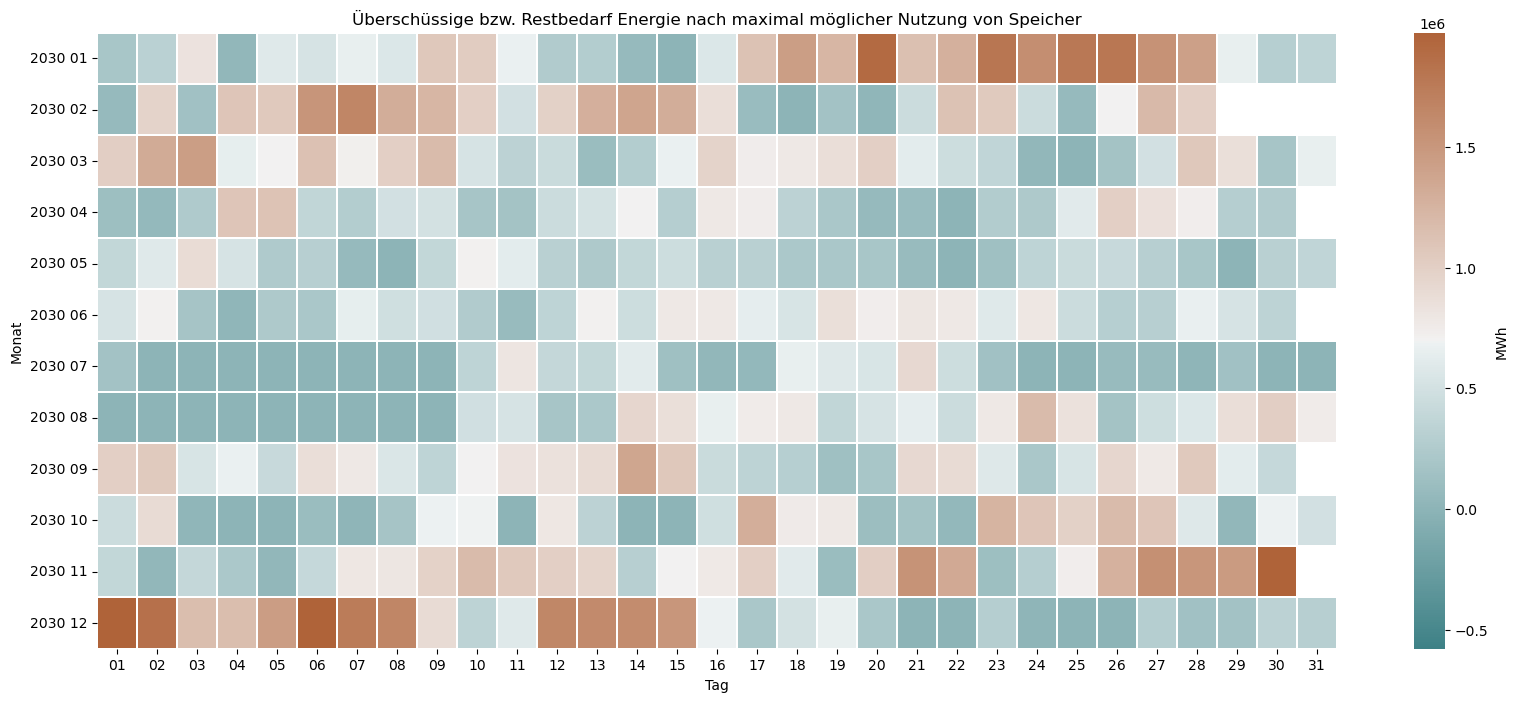

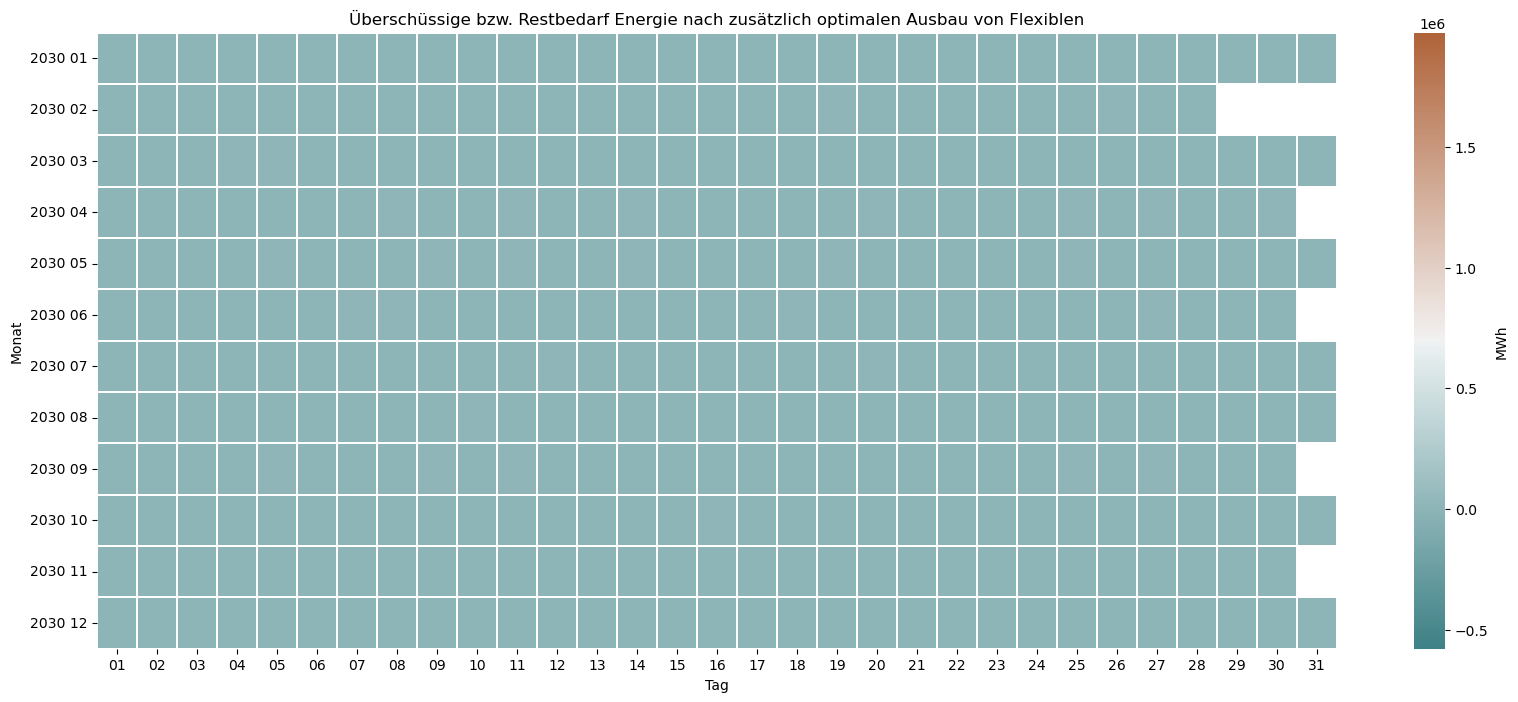

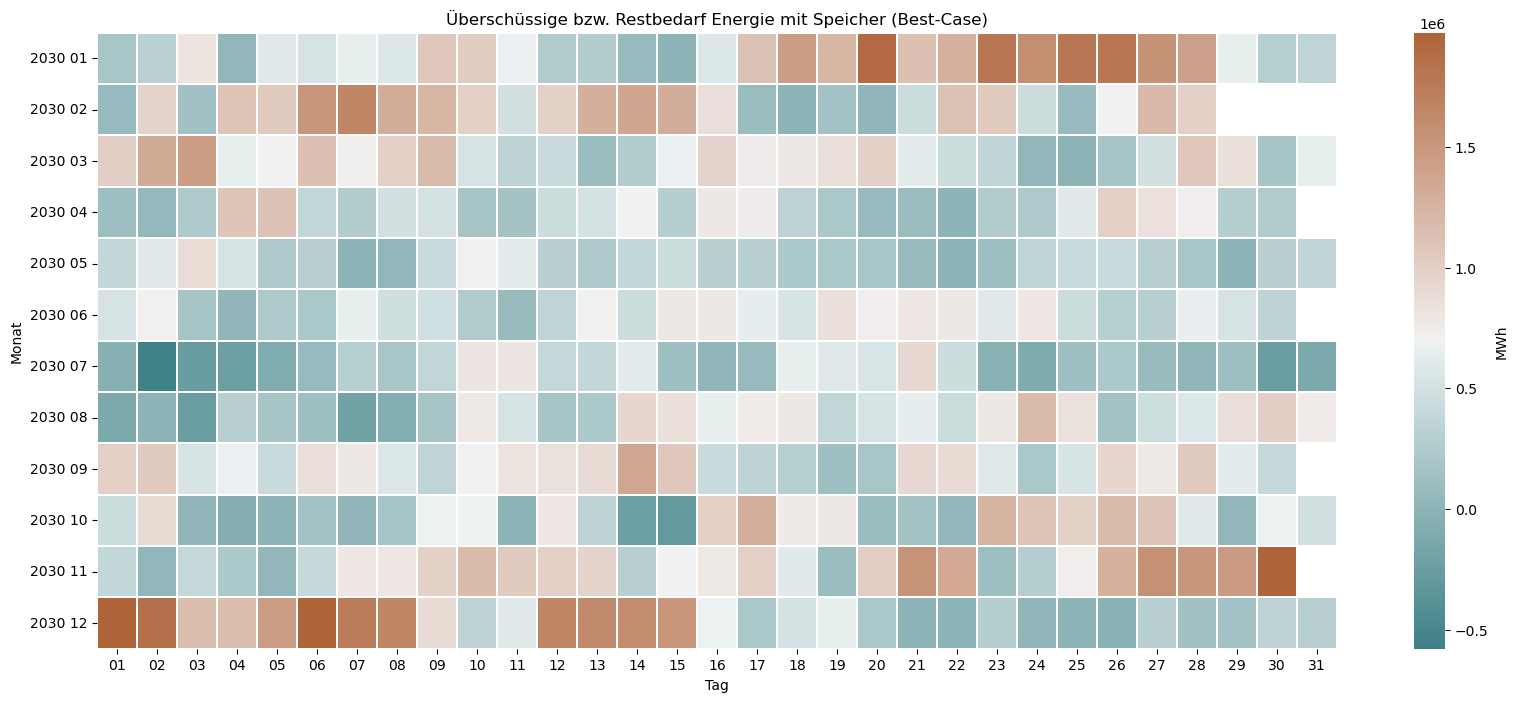

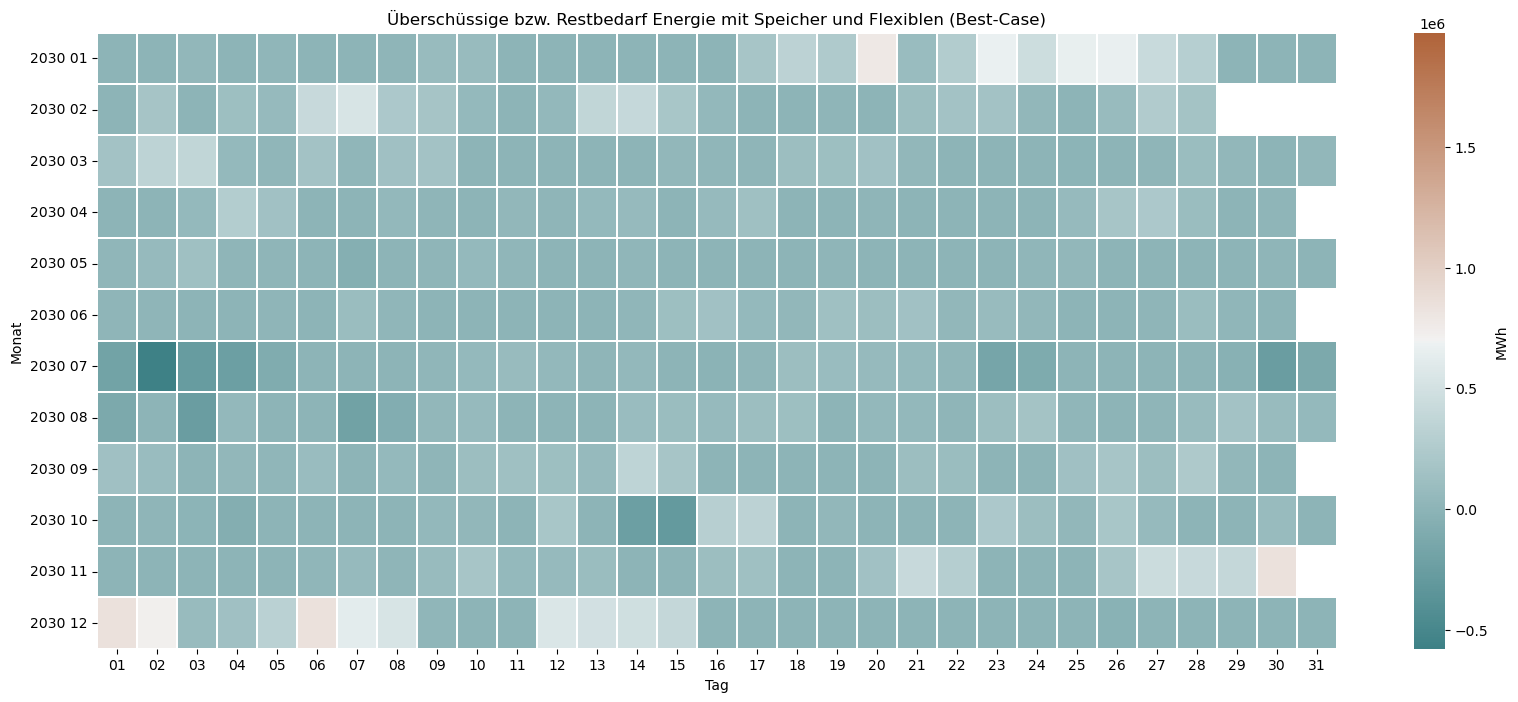

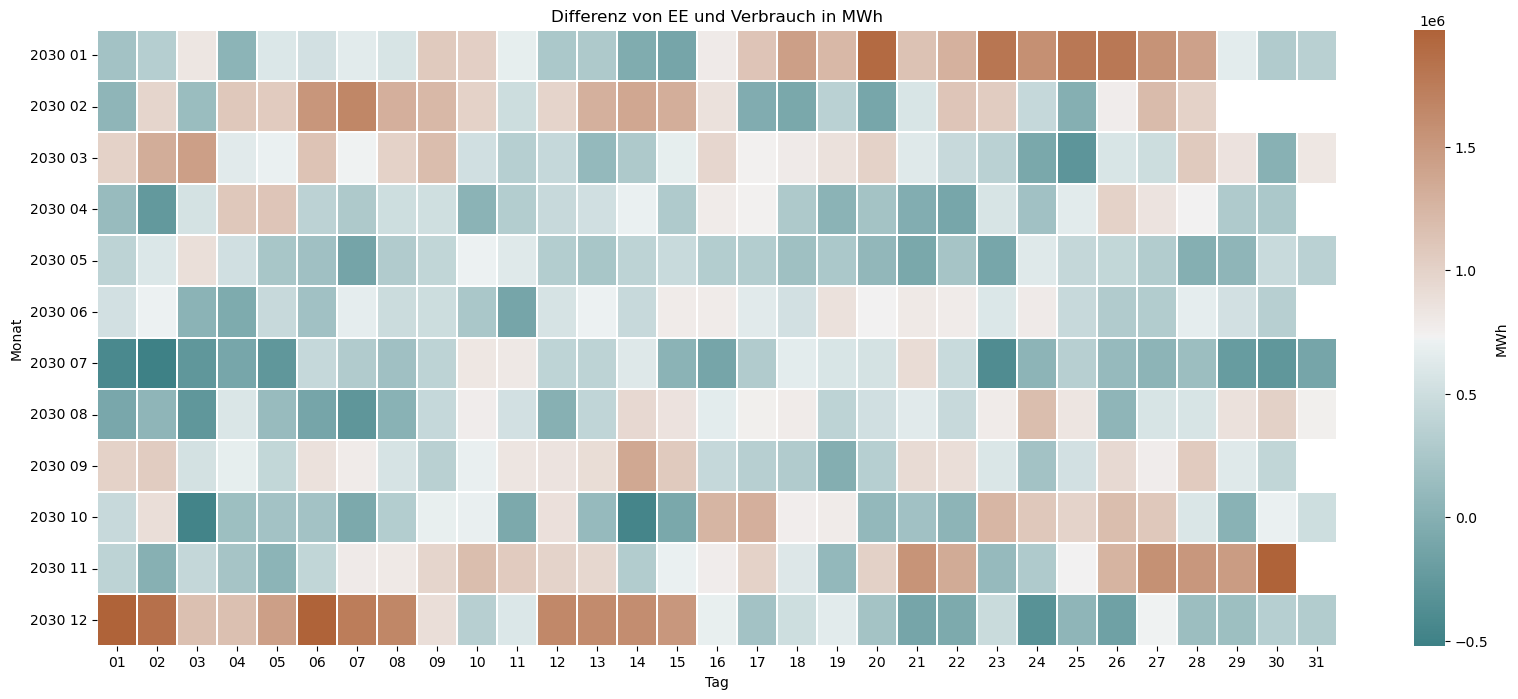

In [15]:
addTimeInformation(calculated_new_difference_df)
addTimeInformation(calculated_all_new_difference_df)
addTimeInformation(new_difference_df)
addTimeInformation(storage_ee_combined_df)

# Beispiel DataFrames und Titel
df_list = [calculated_new_difference_df, calculated_all_new_difference_df,storage_ee_combined_df, new_difference_df]
title_list = ["Überschüssige bzw. Restbedarf Energie nach maximal möglicher Nutzung von Speicher", "Überschüssige bzw. Restbedarf Energie nach zusätzlich optimalen Ausbau von Flexiblen",f"Überschüssige bzw. Restbedarf Energie mit Speicher ({config.params.scenario_name})", f"Überschüssige bzw. Restbedarf Energie mit Speicher und Flexiblen ({config.params.scenario_name})"]
difference_df = [difference_df]
title_difference_list = ["Differenz von EE und Verbrauch in MWh"]
# Aufruf der Funktion

plotCalendarHeatmap(df_list, title_list, 'Restenergiebedarf in MWh')
plotCalendarHeatmap(difference_df, title_difference_list, 'Differenz in MWh')

## Summenhistogramm
Zusätzlich wird ein Summendiagramm erstellt, das die Anzahl der zu 80% durch EE-Energie gedeckten 15-Minuten aufzeigt.

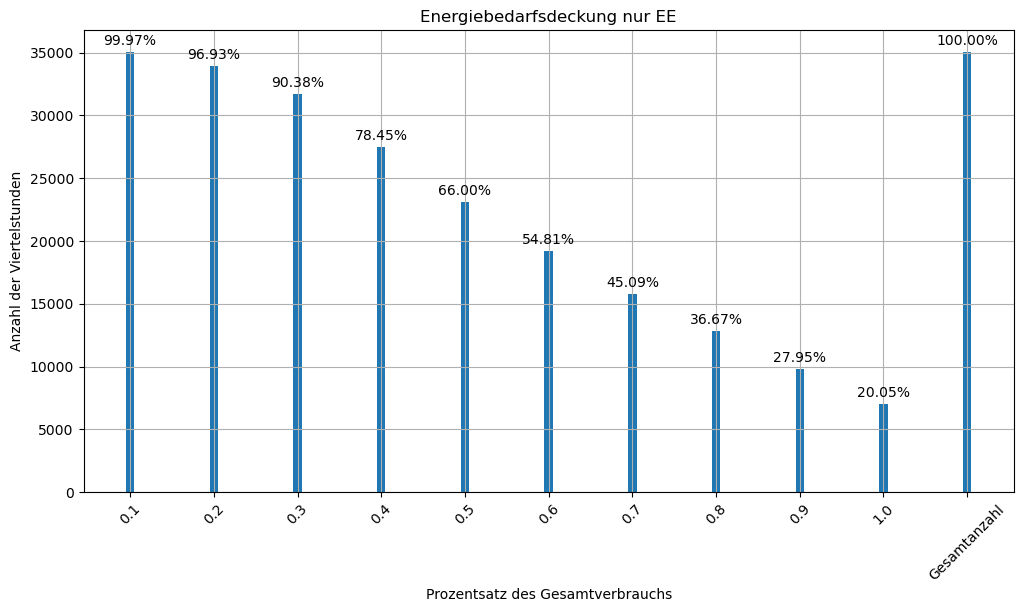

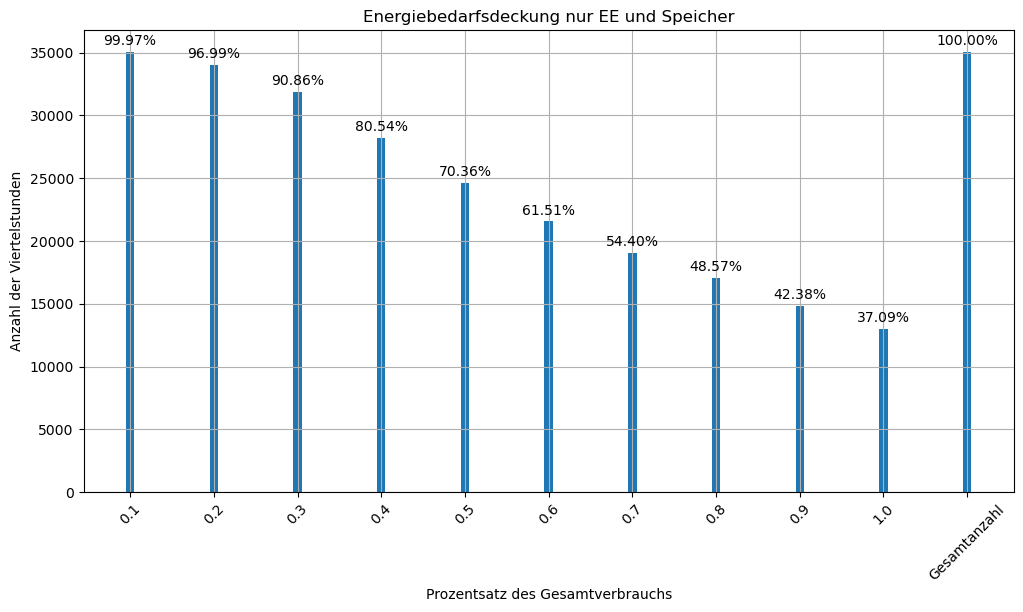

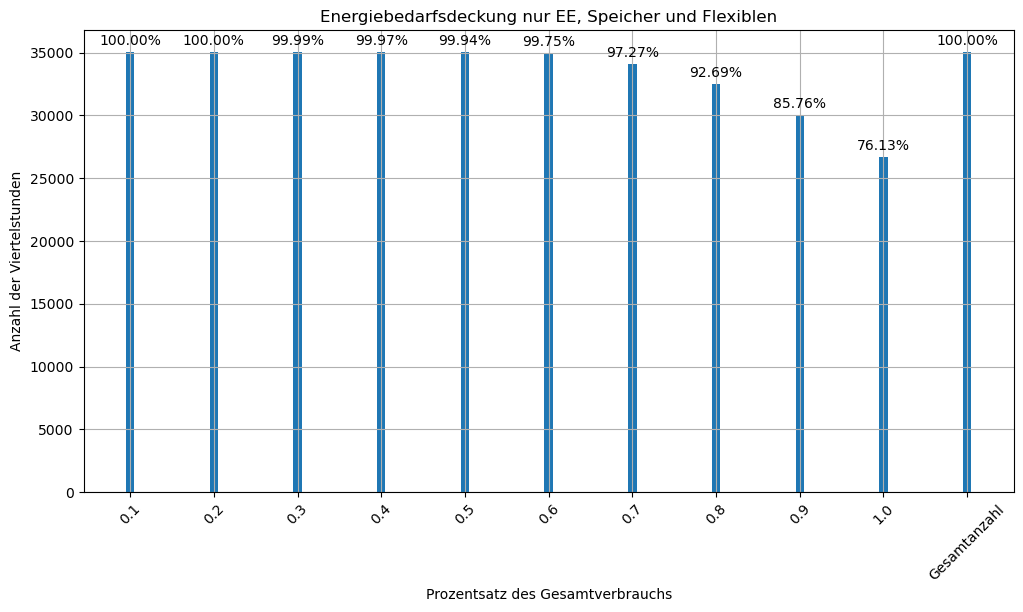

In [16]:

plot_coverage_histogram(cleaned_consumption_end_year, cleaned_production_end_year, 'Gesamterzeugung_EE', 'Energiebedarfsdeckung nur EE', 'assets/plots/summenhistogramm.png')
plot_coverage_histogram(cleaned_consumption_end_year, storage_ee_combined_df,'Speicher + Erneuerbare in MWh', 'Energiebedarfsdeckung nur EE und Speicher', 'assets/plots/summenhistogramm_ee_storage.png')
plot_coverage_histogram(cleaned_consumption_end_year, all_combined_df, 'EE + Speicher + Flexible in MWh', 'Energiebedarfsdeckung nur EE, Speicher und Flexiblen', 'assets/plots/summenhistogramm_all.png')
#plot_coverage_histogram(cleaned_consumption_end_year, calculated_all_df, 'EE + Speicher + Flexible in MWh', 'Anzahl der Viertelstunden, in denen die erzeugte Energie einen bestimmten Prozentsatz des Gesamtverbrauchs deckt', 'assets/plots/summenhistogramm_calculated.png')


## Diagramm für Residuallast (Differenz zw. EE-Erzeugung und Verbrauch)

**positive Differenz (Erzeugung > Verbrauch)**<br>
Hinweis auf eine Überschussproduktion, die EE-Erzeugung deckt den Verbrauch vollkommen und darüber hinaus. Der erzeugte Strom kann nicht vollständig verwendet werden (Exportmöglichkeit).

**negative Differenz (Erzeugung < Verbrauch)**<br>
Der Verbrauch ist höher als die EE-Erzeugung und kann also nicht abgedeckt werden. EE müssen ausgebaut werden.

**Trend**<br>
Die Differenz kann bei höherer Auflösung betrachtet evtl. schwanken -> saisonale Unterschiede in Produktionsmöglichkeiten für EE (bsp. im Winter weniger Sonne).
Ein positiver langfristiger Trend könnte auf eine erfolgreiche Integration erneuerbarer Energien hinweisen, während ein negativer langfristiger Trend auf Herausforderungen bei der Deckung des Energiebedarfs durch erneuerbare Energien hinweisen könnte.


Jahr
2024    1.844057e+08
2025    1.927725e+08
2026    1.985394e+08
2027    2.013124e+08
2028    2.006305e+08
2029    1.959559e+08
2030    2.139990e+08
Name: Differenz, dtype: float64


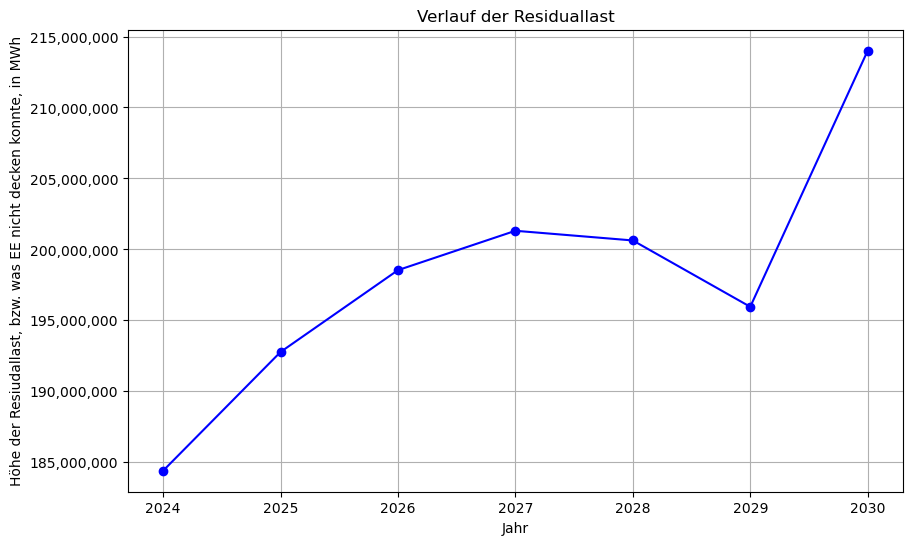

In [17]:

plotResidualDiagram(start_year_simulation, end_year_simulation + 1, directory_yearly_generation, consumption_all_years_including_loadprofile)

## Wochendiagramm: Vergleich Verbrauch Erzeugung/Verbrauch, 15min

In [18]:
selected_week = str(config.params.selected_week_plot)
selected_year = str(config.params.selected_year_plot)

# didirectory_yearly_generation and consumption_all_years_excluding_loadprofile are dicitionaries

addTimeInformation(calculated_storage_df)
addTimeInformation(calculated_flexpowerplant_df)
addTimeInformation(calculated_storage_ee_df)
addTimeInformation(calculated_all_df)
addTimeInformation(storage_df)
addTimeInformation(flexipowerplant_df)
addTimeInformation(storage_ee_combined_df)
addTimeInformation(all_combined_df)
addTimeInformation(production_end_year)
#print(production_end_year)

#plotWeekDiagramm(selected_week, selected_year, consumption_all_years_including_loadprofile, production_end_year, calculated_storage_df, calculated_flexpowerplant_df, calculated_storage_ee_df, calculated_all_df, "wochendiagramm_KW")
plotWeekDiagramm(selected_week, selected_year, consumption_all_years_including_loadprofile, production_end_year, storage_df, flexipowerplant_df, storage_ee_combined_df, all_combined_df, "wochendiagramm_KW")

# CO2-Bilanz bilden

Wir untersuchen weiterhin die Residuallast - die hier verbleibenden MWh geben uns Auskunft über die verbleibenden CO2-Emissionen. Ist die Resiudalllast = 0, sind auch die Emissionen auf 0T gesunken.
Die Emissionen werden pro fossielem Energieträger (Kohle und Gas) berechnet. Eine MWH hat je Energieträger produziert spezifische Werte CO2-Tonnen, diese werden aufsummiert.


In [19]:
#Summiere die Differenz der Viertelstunden

total_residual_energy = (difference_df[0]['Differenz in MWh'].sum())


print(f"Insgesamt müssen {total_residual_energy/1000} GWh über fossile Brennstoffe erzeugt werden.")

if total_residual_energy > 0:
    total_residual_energy_CO2_Kohle = total_residual_energy * CO2_factor_Kohle * share_coal
    total_residual_energy_CO2_gas = total_residual_energy * CO2_factor_Gas * share_gas 
    total_co2 = total_residual_energy_CO2_Kohle + total_residual_energy_CO2_gas
    print("Es werden insgesamt {} Tonnen CO2 emittiert. Davon sind {} Tonnen CO2 aus Kohle und {} Tonnen CO2 aus Gas.".format(total_co2, total_residual_energy_CO2_Kohle, total_residual_energy_CO2_gas))
elif total_residual_energy < 0:
    print("Es wird kein CO2 emittiert.")
else:
    print("Es liegt ein Fehler in der Berechnung vor.") 

Insgesamt müssen 213998.95537343473 GWh über fossile Brennstoffe erzeugt werden.
Es werden insgesamt 61730352.66597636 Tonnen CO2 emittiert. Davon sind 44171310.37967529 Tonnen CO2 aus Kohle und 17559042.286301065 Tonnen CO2 aus Gas.


# Kostenberechnung

In [20]:
total_costs_df = capex()
total_costs_df.to_csv('CSV/Results/total_costs.csv', index=False)

In [21]:
# write dataframes back to csv


consumption_selected_columns = consumption_end_year[['Datum', 'Gesamtverbrauch']]
consumption_selected_columns.to_csv("CSV/Results/final_consumption_ohne_lp.csv", index=False)


consumption_selected_columns = consumption_end_year_including_loadprofile[['Datum', 'Gesamtverbrauch']]
consumption_selected_columns.to_csv("CSV/Results/final_consumption.csv", index=False)

production_selected_columns = directory_yearly_generation.get(config.params.end_year_simulation)[['Datum', 'Photovoltaik', 'Wind Onshore', 'Wind Offshore', 'Wasserkraft', 'Biomasse' , 'Sonstige Erneuerbare', 'Gesamterzeugung_EE']]
production_selected_columns.to_csv("CSV/Results/final_production.csv", index=False)


residual_energy_df = pd.DataFrame({'Residual Energy (MWh)': [residual_energy]})
residual_power_df = pd.DataFrame({'Residual Power (MW)': [residual_power]})

residual_selected_columns = new_difference_df[['Datum', 'Restenergiebedarf in MWh']]
residual_energy_df.to_csv("CSV/Results/further_demand.csv", index=False)
residual_power_df.to_csv("CSV/Results/further_power.csv", index=False)
residual_selected_columns.to_csv("CSV/Results/final_residual.csv", index=False)


# speicher berechnete werte
storage = {
    'Max Speicherbedarf': [calculated_storage_demand],
    'Max Speicherleistung': [calculated_max_storagepower],
    'Max Wasserstoff Bedarf': [calculated_tank_demand],
    'Max Wasserstoff Leistung': [calculated_tank_power]
}

df = pd.DataFrame(storage)

# Schreibe das DataFrame in eine CSV-Datei
df.to_csv("CSV/Results/storage_values.csv", index=False)